<a href="https://colab.research.google.com/github/ashish3127/FAshion-MNIST-CNN/blob/main/Prediction_Pneumonia_or_Normal_By_X_Ray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import Libraries

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# resize all the image to this
IMAGE_SIZE = [64, 64]

train_path = "/content/drive/MyDrive/X rays/train"
valid_path = "/content/drive/MyDrive/X rays/test"

In [3]:
# import the Vgg 16 Library as shown below and add preprocessing layers to the front of VGG
# Here we will be using imagenet weight
import keras
import tensorflow as tf
vgg = vgg=tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape= IMAGE_SIZE + [3],
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

58892288/58889256 [==============================] - 1s 0us/step


In [4]:
# don't train Existing weights
for layer in vgg.layers:
  layer.trainable = False

In [5]:
# useful for getting number of output  classes
folders = glob("/content/drive/MyDrive/X rays/train")

In [6]:

# our layers -you can add more if you want

x= Flatten()(vgg.output)

In [7]:
prediction = Dense(len(folders), activation ='softmax')(x)

In [8]:
#create a model object
model = Model(inputs=vgg.input, outputs = prediction)

In [9]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

In [10]:
# tell the model what cost and optimzation method to use
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [11]:
# use the Image Data Generator to import the Image from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale =1./255,
                                   shear_range = 0.2,
                                   zoom_range =0.2,
                                   horizontal_flip = True)

In [12]:
test_datagen = ImageDataGenerator(rescale =1./255)

In [13]:
# Make sure you previde the same target size as intialied for the image size
training_set = train_datagen.flow_from_directory(train_path, 
                                                 target_size=(64, 64), 
                                                 class_mode='binary')

Found 5253 images belonging to 2 classes.


In [14]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size =(64,64),
                                            batch_size =32,
                                            class_mode ='binary')

Found 624 images belonging to 2 classes.


In [15]:
def plotImages(image_arr):
  fig, axes=plt.subplots(1, 5, figsize=(64, 64))
  axes =axes.flatten()
  for img, ax in zip(image_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show  

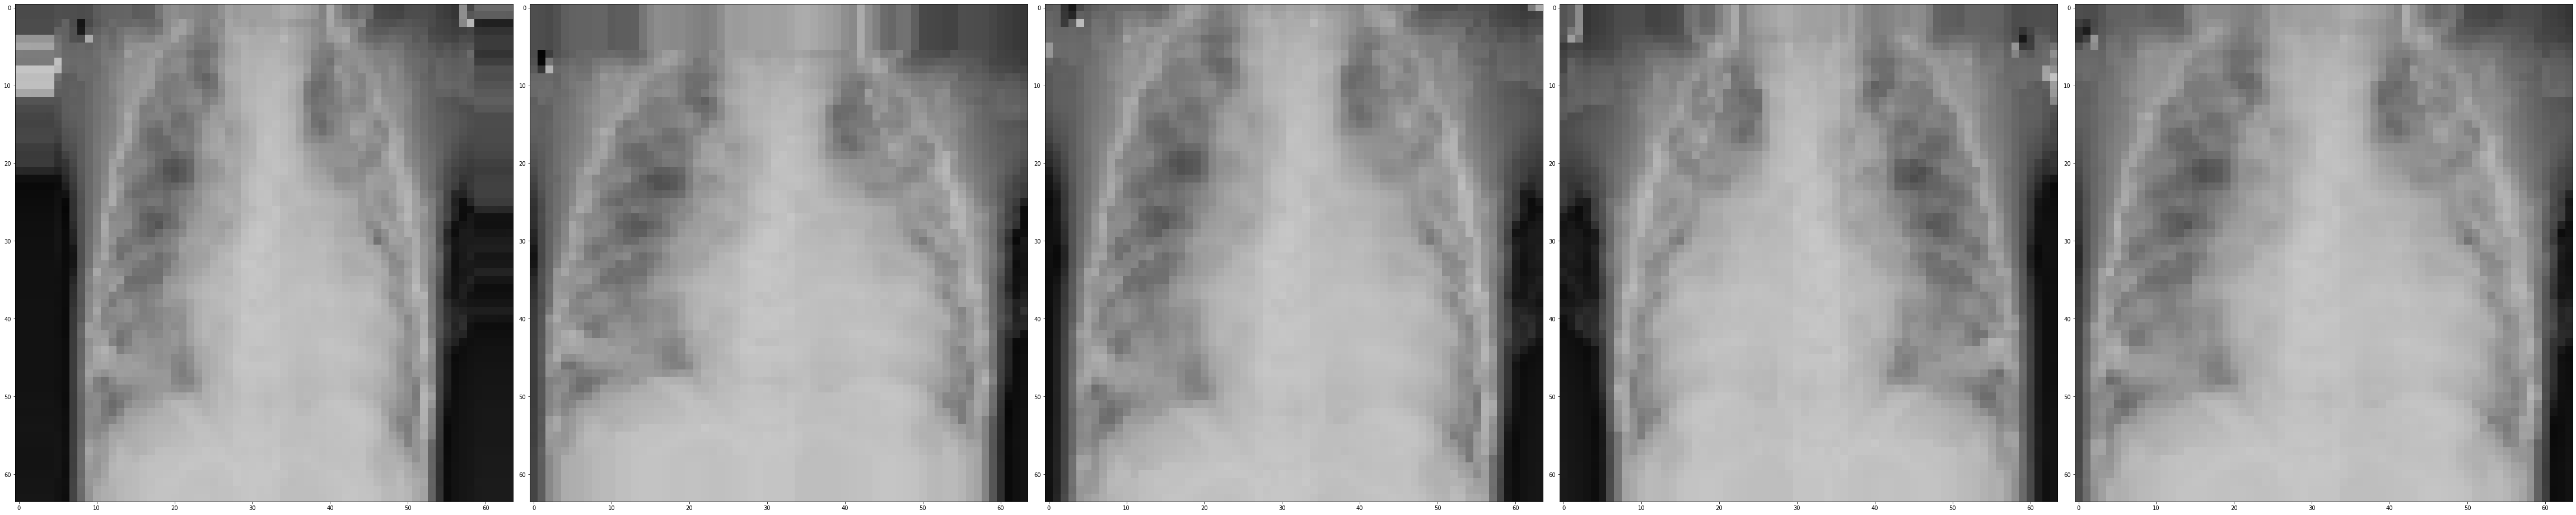

In [16]:
image = [training_set[0][0][0] for i in range(5)]
plotImages(image)

# Fit the model
# run the cell it will tak same to excute

In [17]:
from keras.callbacks import ModelCheckpoint
model_path = "/content/drive/MyDrive/X rays/X_ray_pnemonia_detection.h5"
checkpoint=ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [18]:
history = model.fit(training_set,
                    epochs=5,
                    verbose=1,
                    validation_data= test_set,
                    callbacks= callbacks_list)

Epoch 1/5
165/165 [==============================] - 4225s 26s/step - loss: 0.0000e+00 - accuracy: 0.7547 - val_loss: 0.0000e+00 - val_accuracy: 0.6250

Epoch 00001: val_accuracy improved from -inf to 0.62500, saving model to /content/drive/MyDrive/X rays/X_ray_pnemonia_detection.h5
Epoch 2/5
165/165 [==============================] - 76s 460ms/step - loss: 0.0000e+00 - accuracy: 0.7384 - val_loss: 0.0000e+00 - val_accuracy: 0.6250

Epoch 00002: val_accuracy did not improve from 0.62500
Epoch 3/5
165/165 [==============================] - 75s 453ms/step - loss: 0.0000e+00 - accuracy: 0.7500 - val_loss: 0.0000e+00 - val_accuracy: 0.6250

Epoch 00003: val_accuracy did not improve from 0.62500
Epoch 4/5
165/165 [==============================] - 75s 452ms/step - loss: 0.0000e+00 - accuracy: 0.7390 - val_loss: 0.0000e+00 - val_accuracy: 0.6250

Epoch 00004: val_accuracy did not improve from 0.62500
Epoch 5/5
165/165 [==============================] - 74s 447ms/step - loss: 0.0000e+00 - acc

# test the model

In [23]:
# import libraries
import numpy as np
import keras
from keras.preprocessing.image import ImageDataGenerator

In [25]:
#import model
model_path1 ='/content/drive/MyDrive/X rays/X_ray_pnemonia_detection.h5'
model1 = keras.models.load_model(model_path1) 

In [26]:
h1='/content/drive/MyDrive/X rays/test/PNEUMONIA/person100_bacteria_477.jpeg'
h2='/content/drive/MyDrive/X rays/test/PNEUMONIA/person100_bacteria_480.jpeg'
h3='/content/drive/MyDrive/X rays/test/PNEUMONIA/person103_bacteria_490.jpeg'
h4='/content/drive/MyDrive/X rays/test/PNEUMONIA/person104_bacteria_491.jpeg'
b1='/content/drive/MyDrive/X rays/test/NORMAL/IM-0006-0001.jpeg'
b2='/content/drive/MyDrive/X rays/test/NORMAL/IM-0022-0001.jpeg'
b3='/content/drive/MyDrive/X rays/test/NORMAL/IM-0005-0001.jpeg'

In [27]:
training_set.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [28]:
from keras.preprocessing import image
def pre_pneumonia_or_normal(model1, pneumonia_or_normal):
  test_image = image.load_img(pneumonia_or_normal, target_size=(64,64))
  test_image = image.img_to_array(test_image)/255
  test_image = np.expand_dims(test_image, axis=0)

  result = model1.predict(test_image).round(3)

  pred = np.argmax(result)
  print(result, "--->>>", pred)

  if pred == 0:
    print("predict >> Normal")
  else:
    print("predict >> Human")  

In [30]:
for pneumonia_or_normal in [h1,h2,h3,h4,b1,b2,b3]:
  pre_pneumonia_or_normal(model1, pneumonia_or_normal)

[[1.]] --->>> 0
predict >> Normal
[[1.]] --->>> 0
predict >> Normal
[[1.]] --->>> 0
predict >> Normal
[[1.]] --->>> 0
predict >> Normal
[[1.]] --->>> 0
predict >> Normal
[[1.]] --->>> 0
predict >> Normal
[[1.]] --->>> 0
predict >> Normal
